In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [34]:
pokemon = pd.read_csv("pokemon.csv")

In [11]:
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### 1 bar chart

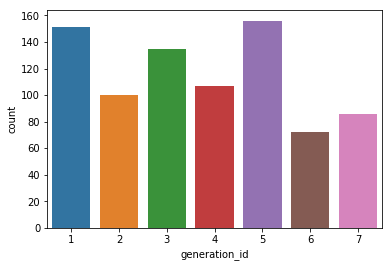

In [14]:
sb.countplot(pokemon["generation_id"]); # ; 避免打印无关信息

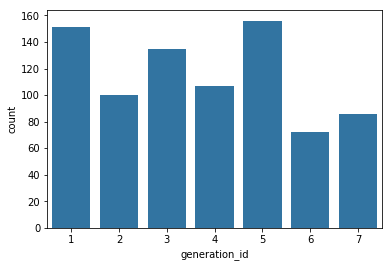

In [17]:
# 色彩太多，统一颜色 
base_color =  sb.color_palette()[0]   
sb.countplot(pokemon["generation_id"],color =base_color)

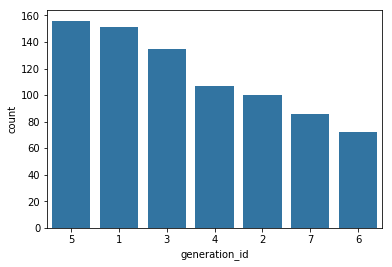

In [19]:
# 增加排序
gen_order = pokemon['generation_id'].value_counts().index
sb.countplot(pokemon["generation_id"],color=base_color, order = gen_order);

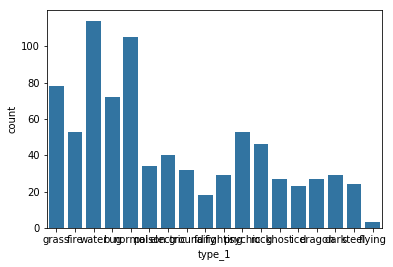

In [22]:
#  关注 type_1 分类
base_color =  sb.color_palette()[0]   
sb.countplot(data=pokemon,x="type_1",color =base_color);

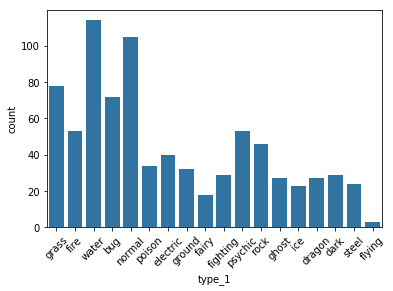

In [24]:
# 调整 坐标轴 标签
sb.countplot(data=pokemon,x="type_1",color =base_color);
plt.xticks(rotation = 45);

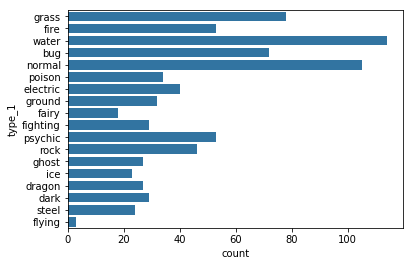

In [27]:
# 调整 坐标轴 Horizontal
sb.countplot(data=pokemon,y="type_1",color =base_color);
plt.yticks(rotation = 0);

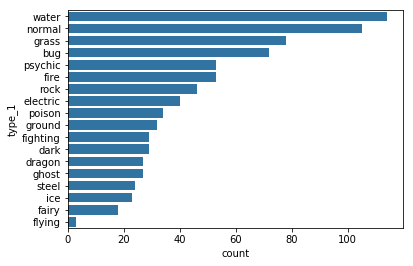

In [29]:
# 调整 排序
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon,y="type_1",color =base_color,order = type_order);

### Absolute VS. Relative Frequency

In [37]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [39]:
pkmn_types = pokemon.melt(id_vars =["id","species"],
                          value_vars =["type_1","type_2"],
                          var_name ="type_level",value_name="type").dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


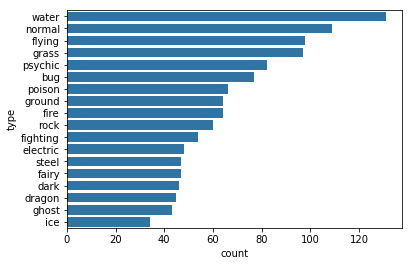

In [43]:
base_color =  sb.color_palette()[0] 
type_counts = pkmn_types["type"].value_counts()
type_order = type_counts.index
sb.countplot(data = pkmn_types, y = "type", color = base_color, order = type_order);

0.162329615861


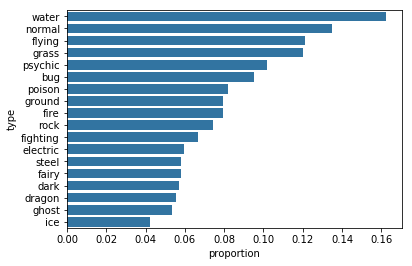

In [48]:
# 显示百分比
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count/ n_pokemon

print(max_prop)
# 用 numpy 调整
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ["{:0.2f}".format(v) for v in tick_props]

base_color =  sb.color_palette()[0] 
sb.countplot(data = pkmn_types, y = "type", color = base_color, order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel("proportion");


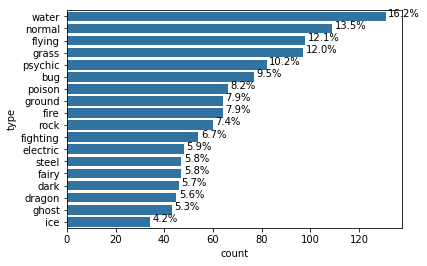

In [49]:
base_color =  sb.color_palette()[0] 
sb.countplot(data = pkmn_types, y = "type", color = base_color, order = type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pot_string ='{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pot_string)

### 画 比例 图 总结

In [50]:
df =pkmn_types
cat_var ="type"

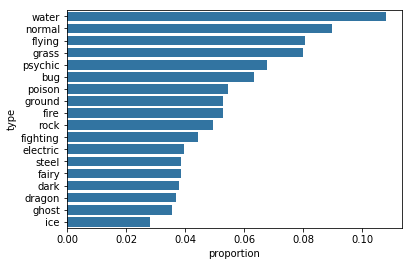

In [59]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = df.shape[0]
max_count = df[cat_var].value_counts().max()
max_prop = max_count / n_points
type_order = df[cat_var].value_counts().index
# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = cat_var, color = base_color,order = type_order)
plt.xticks(tick_props * n_points, tick_names)
plt.xlabel('proportion');

### 添加 文本 总结

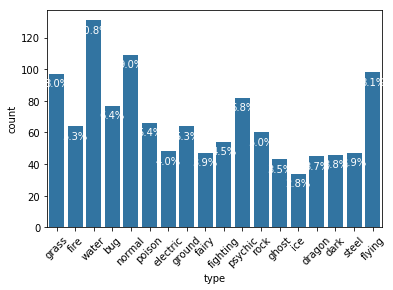

In [62]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = cat_var, color = base_color)
plt.xticks(rotation = 45);

# add annotations
n_points = df.shape[0]
cat_counts = df[cat_var].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')
    

### 缺失值计数

In [65]:
df.isnull().sum()

id            0
species       0
type_level    0
type          0
dtype: int64

In [ ]:
na_counts = df.isnull().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)